### Cap. 5
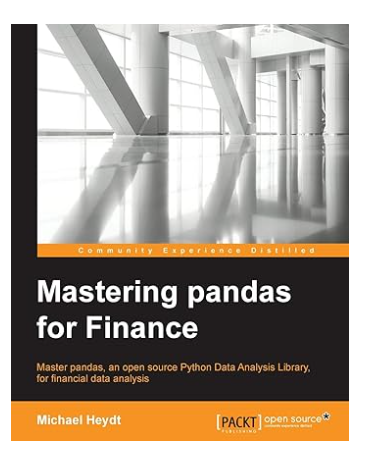

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

### Scarico dati

In [2]:
start = datetime.date(2014,5,31)
end = datetime.date(2024,3,31)
msft = yf.download('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
msft[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,40.950001,41.090000,40.680000,40.790001,34.784847,18504300
2014-06-03,40.599998,40.680000,40.250000,40.290001,34.358463,18068900
2014-06-04,40.209999,40.369999,39.860001,40.320000,34.384041,23209000
2014-06-05,40.590000,41.250000,40.400002,41.209999,35.143021,31865200
2014-06-06,41.480000,41.660000,41.240002,41.480000,35.373264,24060500


In [11]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers) # map applica la funzione data a ciascun elemento nella lista "tickers", restituendo un iteratore contenente i risultati
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date']) # l'iteratore datas viene passato alla funzione concat che concatena i dati in un DataFrame

In [12]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL','PEP','KO','^GSPC']
all_data =get(tickers,start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
all_data[:5]

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.886332   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.167553   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.397837   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.477880   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.421568   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

In [9]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [13]:
daily_close_px = just_closing_prices.pivot('Date', 'Ticker', 'Adj Close')

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [ ]:
daily_close_px[:5]

### Rendimento percentuale

In [ ]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.head()

In [ ]:
daily_pct_change.dropna(inplace=True)

In [ ]:
daily_pct_change.head()

### Rendimento cumulato

In [ ]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return

In [ ]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2)
plt.grid()

### Statistiche descrittive

In [ ]:
aapl = daily_pct_change['AAPL']

In [ ]:
aapl.describe()

In [ ]:
ge = daily_pct_change['GE']

In [ ]:
ge.describe()

In [ ]:
sp500 = daily_pct_change['^GSPC']

In [ ]:
sp500.describe()

In [ ]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

### Distribuzione dei rendimenti

#### Istogrammi

L'istogramma è la rappresentazione grafica (diagramma) di una distribuzione in classi di un carattere continuo.
L'istogramma è costituito da rettangoli adiacenti, le cui basi sono allineate su un asse orientato e dotato di unità di misura (l'asse ha l'unità di misura del carattere e può essere inteso come l'asse delle ascisse). L'adiacenza dei rettangoli dà conto della continuità del carattere. Ogni rettangolo ha base di lunghezza pari all'ampiezza della corrispondente classe; l'altezza invece è calcolata come densità di frequenza, ossia è pari al rapporto fra la frequenza (assoluta) associata alla classe e l'ampiezza della classe.[1]

L'area della superficie di ogni rettangolo coincide con la frequenza associata alla classe cui il rettangolo si riferisce e per tale caratteristica gli istogrammi rappresentano un tipo di areogramma. La somma delle aree dei rettangoli è uguale alla somma delle frequenze dei valori appartenenti alle varie classi.

Volendo si può scegliere di rappresentare nell'istogramma le frequenze relative (anziché le semplici frequenze assolute) delle varie classi.

Dividendo le frequenze relative di un istogramma per l'ampiezza di ciascuna classe si attuerà un processo di normalizzazione dell'istogramma ottenendo così un istogramma di densità, la cui somma delle aree delle ampiezze di ciascuna classe rappresentata sarà uguale ad 1.

In [ ]:
aapl.hist(bins = 50, figsize = (12,8))

E' importante dividere la distribuzione in un numero elevato di intervalli, altrimenti si perde l'idea di come è fatta

In [ ]:
aapl.hist(bins = 10, figsize = (12,8))

In [ ]:
daily_pct_change.hist(bins = 50, sharex = True, figsize = (12,8));

In [ ]:
daily_pct_change.hist(bins = 50, sharex = False, figsize = (12,8));

#### QQ Plot (Grafico quantili/quantili

Il Q-Q Plot è la rappresentazione grafica dei quantili di una distribuzione. Confronta la distribuzione cumulata della variabile osservata con la distribuzione cumulata della normale. Se la variabile osservata presenta una distribuzione normale, i punti di questa distribuzione congiunta si addensano sulla diagonale che va dal basso verso l'alto e da sinistra verso destra.

In [ ]:
import scipy.stats as stats

In [ ]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.grid();

In [ ]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(sp500, dist='norm', plot=ax)
plt.grid();

#### Box and whisker plots ("scatola e baffi")

In statistica il diagramma a scatola e baffi (o diagramma degli estremi e dei quartili[1] o box and whiskers plot o box-plot) è una rappresentazione grafica utilizzata per descrivere la distribuzione di un campione tramite semplici indici di dispersione e di posizione.

Viene rappresentato (orientato orizzontalmente o verticalmente) tramite un rettangolo diviso in due parti, da cui escono due segmenti. Il rettangolo (la "scatola") è delimitato dal primo e dal terzo quartile,[2] q1/4 e q3/4 ("inter-quartile range"), e diviso al suo interno dalla mediana, q1/2. I segmenti (i "baffi") sono delimitati dal minimo e dal massimo dei valori.

In questo modo vengono rappresentati graficamente i quattro intervalli ugualmente popolati delimitati dai quartili.

In [ ]:
daily_pct_change[['AAPL']].plot(kind = 'box', figsize = (3,6))
plt.grid();

In [ ]:
daily_pct_change.plot(kind='box', figsize=(12,8))
plt.grid();

### Scatter plot

In [ ]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

In [ ]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'KO', 'AAPL', xlim=limits)
plt.grid()

### Matrice di scatter plot

In [ ]:
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal = 'kde', alpha = 0.1, figsize = (12,12));